In [1]:
%run -i ./../common/common
%run -i ./../vortex/vortex
%matplotlib inline

In [7]:
def vortex_line(start: Coords, end: Coords, n: int) -> ('numpy.ndarray', 'numpy.ndarray'):
    xs = np.linspace(start.x, end.x, n)
    ys = np.linspace(start.y, end.y, n)
    
    return (xs, ys)

In [22]:
def vortex_line_velocity(grid: Grid, line, strength: float) -> ('numpy.ndarray', 'numpy.ndarray'):
    xs, ys = line
    u = np.zeros_like(grid[0])
    v = u.copy()
    
    for (x, y) in zip(xs, ys):
        u_add, v_add = Vortex(x, y, strength).velocity(grid)
        u += u_add
        v += v_add
    
    return (u, v)

In [23]:
N = 50
rect = Rect(-2.0, 2.0, -1.0, 1.0)
grid = rect.make_grid(N)

In [50]:
mult = 16.0
step = 0.4
line_coords = (Coords(rect.x_start*mult, 0.0), Coords(rect.x_end*mult, 0.0))
line = vortex_line(*line_coords, 1+int(rect.width*mult/step))
vel = vortex_line_velocity(grid, line, 0.1)

In [51]:
size = 10

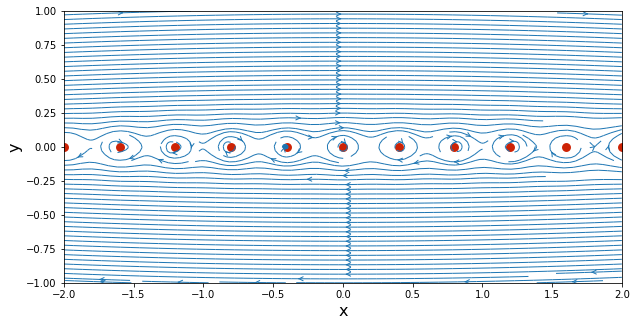

In [52]:
setup_fig(rect, size)
streamplot_with(*grid, *vel, override={'arrowsize': 1})
plt.scatter(*line, **scatter_params)

In [42]:
def horizontal_infinite_vortex_line_velocity(grid: Grid, strength: float, step:float):
    coeff = (2.0 * math.pi)/step
    X, Y = grid
    shared = strength / (2.0 * step * (np.cosh(Y*coeff) - np.cos(X*coeff)))
    u = +np.sinh(Y * coeff) * shared
    v = -np.sin (X * coeff) * shared
    return (u, v)

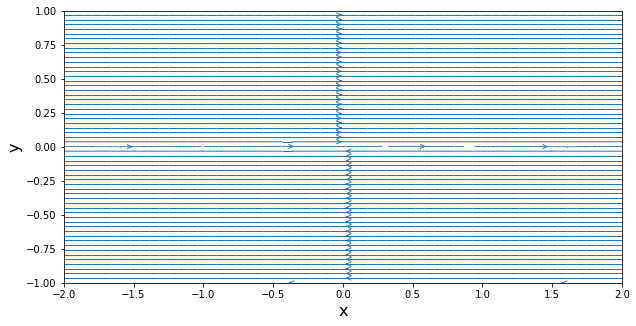

In [54]:
vel = horizontal_infinite_vortex_line_velocity(grid, 0.1, step = rect.width/(5*N))

setup_fig(rect, size)
streamplot_with(*grid, *vel, override={'arrowsize': 1})